<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_SprintII(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics - Sprint II(B)
### Bruno Odon

## Descrição do problema

Instalando as bibliotecas TensorFlow e Keras

In [1]:
!pip install tensorflow
!pip install keras

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

In [5]:
!mkdir -pv datasets/music
!wget 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip' -P datasets/

mkdir: created directory 'datasets'
mkdir: created directory 'datasets/music'
--2023-07-19 11:29:47--  https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10632185 (10M) [application/zip]
Saving to: ‘datasets/music.zip’

music.zip           100%[===================>]  10.14M  --.-KB/s    in 0.06s   

2023-07-19 11:29:50 (166 MB/s) - ‘datasets/music.zip’ saved [10632185/10632185]



In [6]:
import zipfile
dataset = 'datasets/music.zip'
dest = 'datasets/music/'
with zipfile.ZipFile(dataset,'r') as zip_ref:
  zip_ref.extractall(dest)

In [7]:
#verificando o número de imagens que foram extraídas
path='datasets/music/'
print(f"Temos um total de {len(os.listdir(path))} imagens em nosso dataset")

#exemplos de algumas imagens extraídas
print(f"Primeiras 20 imagens: \n {os.listdir(path)[:20]}")


Temos um total de 2596 imagens em nosso dataset
Primeiras 20 imagens: 
 ['1634117704444_Mixer mackie for sale.jpg', '1634117899869_yamaha psr2000 for sale.jpg', '1634110111179_Box Guitar Diviser for sale.jpg', '1634110346646_MAX Professional 4 Channel USB Interface  Mixer with Mobile Output for sale.jpg', '1634111875815_YAMAHA PSR  125 Electric Keyboard for sale.jpg', '1634112047058_PV SP2G TOPS speakers for sale.jpg', '1634118001110_5 String Bass Guitar for sale.jpg', '1634110942392_Piano Center Kohuwala for sale.jpg', '1634110701497_Guitargfx8 Paddle for sale.jpg', '1634113404318_Bc Original Speakers for sale.jpg', '1634117840230_Yamaha Acoustic Drum for sale.jpg', '1634118004234_Suzuki Semi Acoustic Guitars  Box for sale.jpg', '1634111149872_Yamaha Psr S700 for sale.jpg', '1634111518613_Crown Amp for sale.jpg', '1634110840753_Epiphone EJ200CE 42 Jumbo Acoustic Solid Wood Guitar for sale.jpg', '1634110987384_Yamaha SY77 Music Synthesizer for sale.jpg', '1634110230870_Electric Guitar 

In [88]:
from sklearn.preprocessing import FunctionTransformer
import re
#Criando um DataFrame com as informações das imagens

images = os.listdir(path)
labels, heights, widths, channels, filesize, files = [], [], [], [], [], []

# Loop que percorre cada uma das imagens extraídas
for fname in images:
    try:
      inst_type = str(fname)[14:].replace('.jpg', '').replace('for sale', '')
      if (not ('Amplifier' or 'Amp') and 'Bass Guitar' or 'Bass') in inst_type:
        name = "Bass Guitar"
        files.append(fname)
        labels.append(name)
      if 'Acoustic Guitar' in inst_type:
        name = "Acoustic Guitar"
        files.append(fname)
        labels.append(name)
      if (not ("Bass" or "Amp" or "Amplifier" or "amplifier" or "Pedals" or "pedals" or "Acoustic") and "Guitar" or "Guitar" or "Guitars" or "GUITAR" or "guitar") in inst_type:
        name = "Guitar"
        files.append(fname)
        labels.append(name)
      if "Piano" in inst_type:
        name = "Piano"
        files.append(fname)
        labels.append(name)
      if "Keyboard" in inst_type:
        name = "Keyboard"
        files.append(fname)
        labels.append(name)
      if ("Mic" or "Microphone") in inst_type:
        name = "Microphone"
        files.append(fname)
        labels.append(name)
      if "Violin" in inst_type:
        name = "Violin"
        files.append(fname)
        labels.append(name)
      if ("DRUM" or "Drum" or "Drums" or "DRUMS") in inst_type:
        name = "Drums"
        files.append(fname)
        labels.append(name)
      if name != '':
        img_shape = mpimg.imread(path+fname).shape
        heights.append(img_shape[0])
        widths.append(img_shape[1])
        channels.append(img_shape[2])
        filesize.append(os.path.getsize(path+fname))
    except:
      print('Não foi possível')
# Criação do dataset
df = pd.DataFrame({'images': files, 'class': labels})
df.sample(frac=1).reset_index(drop=True).head(12)



,images,class
0,1634112841825_Bass guitar4 strings for sale.jpg,Bass Guitar
1,1634111864015_4 String Bass Guitar for sale.jpg,Bass Guitar
2,1634111716638_Yamaha FG 412 12 12 String Guita...,Guitar
3,1634110662533_Eletric Japan Bass Guitar for sa...,Guitar
4,1634117672125_Yamaha Guitar F310 for sale.jpg,Guitar
5,1634110512899_PEAVEY 5 String Bass Guitar Prea...,Bass Guitar
6,1634111113670_Casio Electric Piano for sale.jpg,Piano
7,1634114456250_Guitar for sale.jpg,Guitar
8,1634111113958_Casio CTK 100 Keyboard for sale...,Keyboard
9,1634111320261_Acoustic Guitar S Yairi for sale...,Guitar


Guitar             543
Microphone         172
Keyboard           113
Piano               87
Bass Guitar         79
Acoustic Guitar     72
Violin              52
Drums                5
Name: class, dtype: int64


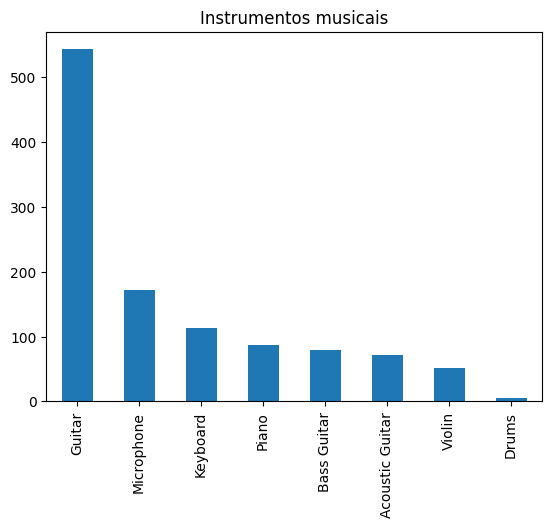

In [89]:
#Visualizando a proporção de imagens por classe
print((df['class']).value_counts())
instruments_count = df['class'].value_counts().plot.bar(title='Instrumentos musicais')

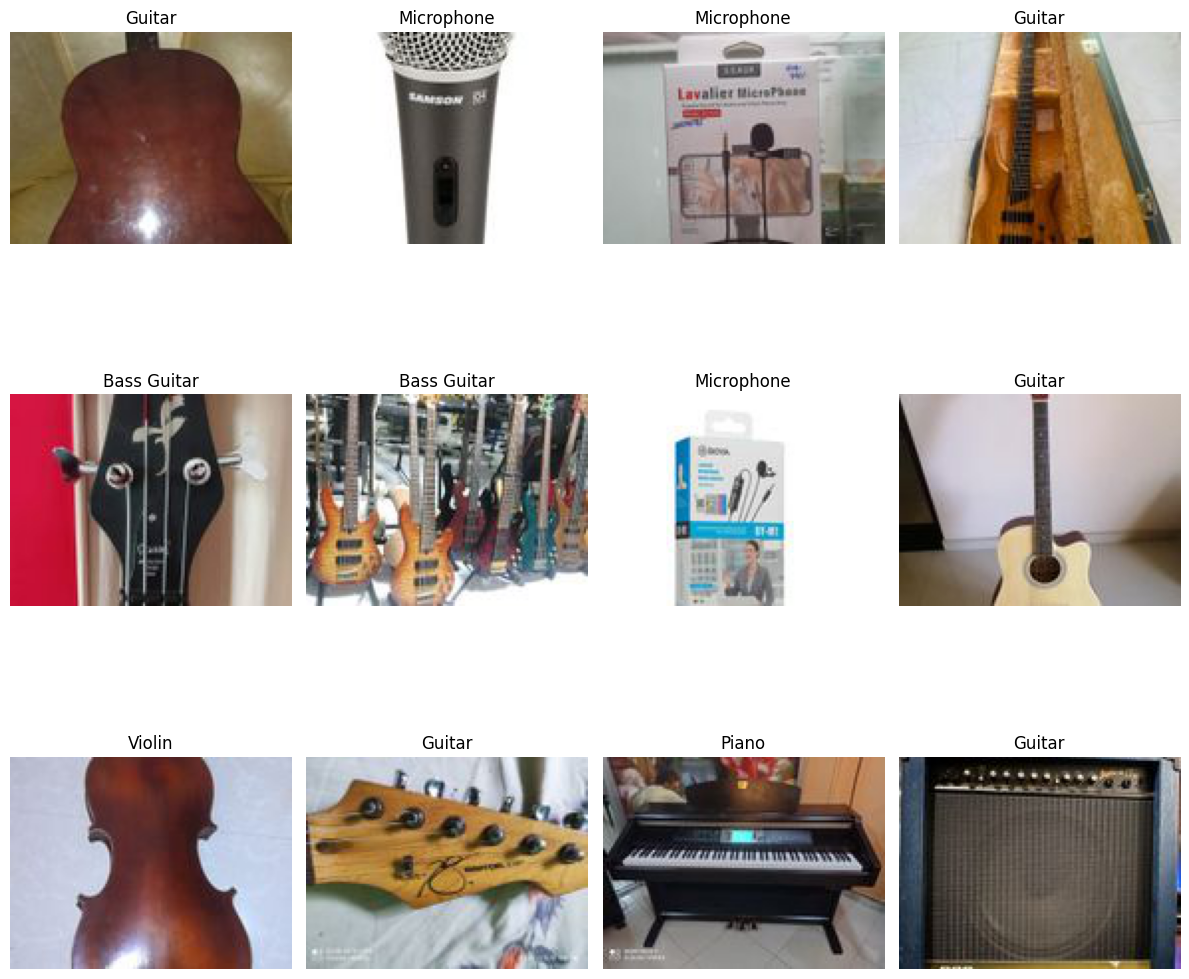

In [90]:
#Visualizando algumas imagens do conjunto de dados
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)
df_random = df.sample(frac=1).reset_index(drop=True).head(12)
for i, row in df_random.iterrows():
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')
    classe = row['class']
    img_name = row['images']
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(classe)
plt.tight_layout()
plt.show()

In [91]:
#Dividindo o dataset em 70% para treino e 30% para teste
train, test = train_test_split(df[['images', 'class']], test_size=0.3, random_state=42, shuffle=True)
#visualizando a divisão dos dados:
print("CONJUNTO DE TREINO")
print(train)
print("CONJUNTO DE TESTE")
print(test)

CONJUNTO DE TREINO
                                                 images        class
716                  1634112098387_UHF Mic for sale.jpg   Microphone
599   1634109761844_Acoustic Guitar Parkwood W81OP f...       Guitar
65    1634111113958_Casio CTK  100 Keyboard for sale...     Keyboard
956    1634112452533_Classical Box Guitars for sale.jpg       Guitar
1019         1634117405100_Electric Guitar for sale.jpg       Guitar
...                                                 ...          ...
466   1634112998499_Wireless Bluetooth Karaoke Micro...   Microphone
121   1634110149747_ZOOM B1X Bass guitar pedal for s...  Bass Guitar
1044     1634110387996_Guitar Leather Case for sale.jpg       Guitar
1095  1634118031708_Toyoma Full Size Violin for sale...       Violin
860          1634112137360_Bernstein Piano for sale.jpg        Piano

[786 rows x 2 columns]
CONJUNTO DE TESTE
                                                 images            class
971   1634110945036_Cremona Natural Co

# Preparação dos dados

ImageDataGenerator é uma classe utilitária fornecida pelo TensorFlow para aumentar e pré-processar dados de imagens. É comumente usada em tarefas de deep learning, especialmente para classificação de imagens, para gerar imagens aumentadas (data augmentation) sob demanda durante o treinamento do modelo.

Utilizamos ainda o ImageDataGenerator para separar um conjunto de validação com 20% das amostras do conjunto de treino. É importante que o conjunto de validação não contenha as imagens de teste, tendo em vista que elas não deveriam ser conhecidas no momento do treinamento.

Veja que neste caso é usado o método flow_from_dataframe() para gerar imagens aumentadas a partir de um dataframe que aponta para as imagens originais. O método recebe parâmetros como o dataframe, o diretório com as imagens, o tamanho do lote (batch size) e o modo de classe (neste caso, binário porque são apenas duas classes), entre outros.

Importante ressaltar que o pré-processamento do teste não evolve o aumento de dados.

In [93]:
train_datagen=ImageDataGenerator(validation_split=0.2, #include validation split
                                 rescale = 1.0/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_dataframe(
    train ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='training' #training set
    )

val_generator=train_datagen.flow_from_dataframe(
    train ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='validation' #validation set
    )

test_generator=test_datagen.flow_from_dataframe(
    test ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',)

Found 629 validated image filenames belonging to 8 classes.
Found 157 validated image filenames belonging to 8 classes.
Found 337 validated image filenames belonging to 8 classes.


Visualizando um exemplo do tratamento das imagens

In [ ]:
# Pegando um registro do dataframe
sample = df.sample(n=1)

# Neste caso o tipo de classe é categorico, pois temos um exemplo com apenas uma classe
sample_generator = train_datagen.flow_from_dataframe(
    sample,
    path,
    x_col='images',
    y_col='class',
    target_size=(150,150),
    class_mode='categorical'
)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

# Configuração de um modelo de deep learning usando uma rede neural convolucional (CNN) simples com a biblioteca Keras

Definição da arquitetura do modelo
Aqui é especificada uma camada convolucional 2D que possui 32 filtros, um tamanho de filtro de 3x3 que usa a função de ativação ReLU. O parâmetro input_shape define a forma das imagens de entrada para a rede. Na sequência são adicionadas camadas max-pooling com a mesma função de ativação.

In [102]:
model=models.Sequential()
model.add(layers.Conv2D(32 ,(3,3) , activation='relu' , input_shape=(150,150,3 ) ) )
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(64 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

In [103]:
model.add(layers.Flatten() )
model.add(layers.Dropout(0.25))
model.add(layers.Dense( 512 ,activation='relu' ))
model.add(layers.Dropout(0.25))
model.add(layers.Dense( 1 , activation='sigmoid' ) )

O método summary() é usado para exibir um resumo da arquitetura do modelo de rede neural. Ele fornece uma representação compacta das camadas do modelo e seus parâmetros, incluindo o número de parâmetros treináveis e a forma de saída de cada camada.

In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0